<h1 align='center'><b><font color='indianred'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='indianred'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





# <font color='indianred'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

In the given dataset, we can find that the data is highly imbalanced, so it is clearly not a good choice to consider accuracy as a evaluation metric, So in such cases F1 score is the best metric to use, and I will be considering F1 score in the further parts of the code to find the best pipleline...

# <font color='indianred'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

5. Make sure to modify the plot learning curve code to incorporate apprioparite metric. The default is accuracy which may noit be a good choice.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. No need to submit the pdf version.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

# <font color ='pickle'>**Installing/Importing libraries**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import necessary libraries
import pandas as pd
from pathlib import Path
import sys

# Import the joblib library for saving and loading models
import joblib

# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

# Import the scipy library for working with sparse matrices
from scipy.sparse import csr_matrix

In [3]:
!pip install -U nltk -qq
!pip install -U spacy -qq
!python -m spacy download en_core_web_sm -qq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -U nltk -qq
    !pip install -U spacy -qq
    !python -m spacy download en_core_web_sm -qq

    basepath = '/content/drive/MyDrive/NLP_SPAM'
    sys.path.append('/content/drive/MyDrive/NLP_SPAM/custom-functions')
else:
    basepath = 'https://drive.google.com/drive/folders/1KDIfajX7CmlAoqP1qTVOmNtULY06Tvxt?usp=drive_link'
    sys.path.append(
        'https://drive.google.com/drive/folders/1wBkRgh06-wKwTcUbDwdxFqAcOJCsmAdF?usp=drive_link')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/usr/local/lib/python3.10/dist-packages/setuptools/_vendor',
 '/root/.ipython',
 '/content/drive/MyDrive/NLP_SPAM/custom-functions']

In [6]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [7]:
base_folder = Path(basepath)
data_folder = base_folder/'/content/drive/MyDrive/NLP_SPAM/spam.csv'
model_folder = base_folder/'/content/drive/MyDrive/NLP_SPAM'

In [8]:
model_folder.mkdir(exist_ok=True, parents=True)

# <font color ='pickle'>**Load dataset**

In [9]:
data = pd.read_csv('/content/drive/MyDrive/NLP_SPAM/spam.csv', encoding='ISO-8859-1')

In [10]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# Selecting only relevant columns ('label' and 'message') and renaming them
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [12]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
sns.set_style('darkgrid')


Text(0.5, 1.0, 'Count Plot')

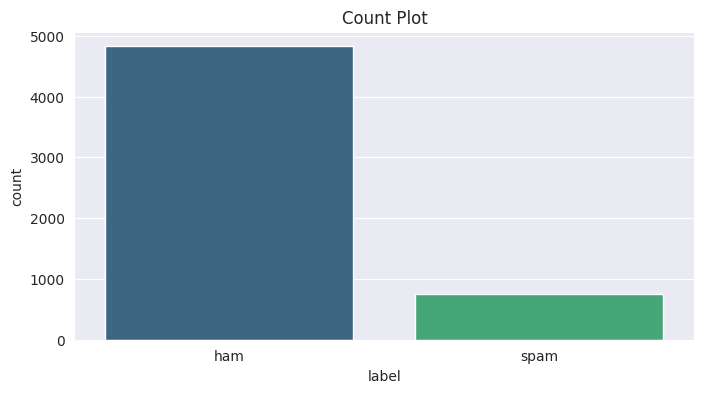

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=data, palette='viridis')

plt.title('Count Plot')

In [17]:
# Calculate the percentage of spam and ham
total_messages = len(data)
ham_count = len(data[data['label'] == 'ham'])
spam_count = len(data[data['label'] == 'spam'])

ham_percentage = (ham_count / total_messages) * 100
spam_percentage = (spam_count / total_messages) * 100

# Display the results
print(f"Ham Percentage: {ham_percentage:.2f}%")
print(f"Spam Percentage: {spam_percentage:.2f}%")

Ham Percentage: 86.59%
Spam Percentage: 13.41%


In [18]:
# Converting 'ham' to 0 and 'spam' to 1 (encoding)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})
data['label']

,label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [19]:
data.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# <font color ='pickle'>**Train-Test Split**

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size = 0.2, random_state = 42)


In [21]:
train.head()

,label,message
1978,0,No I'm in the same boat. Still here at my moms...
3989,1,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,0,They r giving a second chance to rahul dengra.
4078,0,O i played smash bros &lt;#&gt; religiously.
4086,1,PRIVATE! Your 2003 Account Statement for 07973...


In [22]:
test.head()

,label,message
3245,0,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
944,0,I sent my scores to sophas and i had to do sec...
1044,1,We know someone who you know that fancies you....
2484,0,Only if you promise your getting out as SOON a...
812,1,Congratulations ur awarded either å£500 of CD ...


In [23]:
train.shape

(4457, 2)

In [24]:
test.shape

(1115, 2)

# <font color ='pickle'>**Create Subset of Data**

In [25]:
train_smaller = train.sample(frac=0.1, replace=True, random_state=1)

In [26]:
test_smaller = test.sample(frac=0.1, replace=True, random_state=1)

# <font color ='pickle'>**Exploratory Data Analysis**

In [27]:
# Printing basic info
train_smaller.info()


<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 4553 to 268
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    446 non-null    int64 
 1   message  446 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.5+ KB


In [28]:
# Checking distribution of class labels for train dataset
train_smaller['label'].value_counts()

,count
label,
0,389
1,57


In [29]:
# Checking distribution of class labels for test dataset
test_smaller['label'].value_counts()

,count
label,
0,98
1,14


The data is so imbalanced



# <font color ='pickle'>**Classification Pipeline**

## <font color ='pickle'>**PreProcessing**

In [30]:
X_train = train_smaller['message'].values
X_test = test_smaller['message'].values
y_train = train_smaller['label'].values
y_test = test_smaller['label'].values

print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test: {y_test.shape}')


X_train: (446,) y_train: (446,)
X_test: (112,) y_test: (112,)


In [31]:
cp.SpacyPreprocessor??


In [32]:
X_train_cleaned_bow = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_train)

/content/drive/MyDrive/NLP_SPAM/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [33]:
# save  this to a file
file_X_train_cleaned_bow = model_folder / 'X_train_cleaned_bow.pkl'
joblib.dump(X_train_cleaned_bow, file_X_train_cleaned_bow)

['/content/drive/MyDrive/NLP_SPAM/X_train_cleaned_bow.pkl']

In [34]:
X_test_cleaned_bow = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_test)


In [35]:
# save  this to a file
file_X_test_cleaned_bow = model_folder / 'X_test_cleaned_bow.pkl'
joblib.dump(X_test_cleaned_bow, file_X_test_cleaned_bow)


['/content/drive/MyDrive/NLP_SPAM/X_test_cleaned_bow.pkl']

## <font color ='pickle'>**Pipeline 1: Data Preprocessing + Sparse Embeddings (TF-IDF) + ML Model**

### <font color ='pickle'>**Create Pipeline**

In [36]:
classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', LogisticRegression(max_iter=10000)),])

### <font color ='pickle'>**Parameter Grid**

In [37]:
param_grid_classifier_1 = {'vectorizer__max_features': [1000, 2000, 5000],
                           'classifier__C': [1, 10, 100,]
                           }

### <font color ='pickle'>**Specify Randomized Search**

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
randserch_classifier_1 = RandomizedSearchCV(
    classifier_1, param_grid_classifier_1, cv=3)

### <font color ='pickle'>**Fit the model**

In [40]:
# Fit the model on training data
X_train_cleaned_bow= joblib.load(file_X_train_cleaned_bow)
randserch_classifier_1.fit(X_train_cleaned_bow, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vectorizer',
                                              TfidfVectorizer(token_pattern='[\\S]+')),
                                             ('classifier',
                                              LogisticRegression(max_iter=10000))]),
                   param_distributions={'classifier__C': [1, 10, 100],
                                        'vectorizer__max_features': [1000, 2000,
                                                                     5000]})

### <font color = 'pickle'>**Get Best Params**

In [41]:
print(f'Best cross-validation score: {randserch_classifier_1.best_score_:.2f}')
print("\nBest parameters: ", randserch_classifier_1.best_params_)
print("\nBest estimator: ", randserch_classifier_1.best_estimator_)

Best cross-validation score: 0.94

Best parameters:  {'vectorizer__max_features': 2000, 'classifier__C': 100}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=2000, token_pattern='[\\S]+')),
                ('classifier', LogisticRegression(C=100, max_iter=10000))])


### <font color ='pickle'>**Save Model**

In [42]:
file_best_estimator_pipeline1_round1 = model_folder / \
    'pipeline1_round1_best_estimator.pkl'
file_complete_grid_pipeline1_round1 = model_folder / \
    'pipeline1_round1_complete_grid.pkl'

In [43]:
joblib.dump(randserch_classifier_1.best_estimator_,
            file_best_estimator_pipeline1_round1)
joblib.dump(randserch_classifier_1, file_complete_grid_pipeline1_round1)

['/content/drive/MyDrive/NLP_SPAM/pipeline1_round1_complete_grid.pkl']

### <font color ='pickle'>**Load Saved Model**

In [44]:
# load the saved model
best_estimator_pipeline1_round1 = joblib.load(
    file_best_estimator_pipeline1_round1)
complete_grid_pipeline1_round1 = joblib.load(
    file_complete_grid_pipeline1_round1)

### <font color ='pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

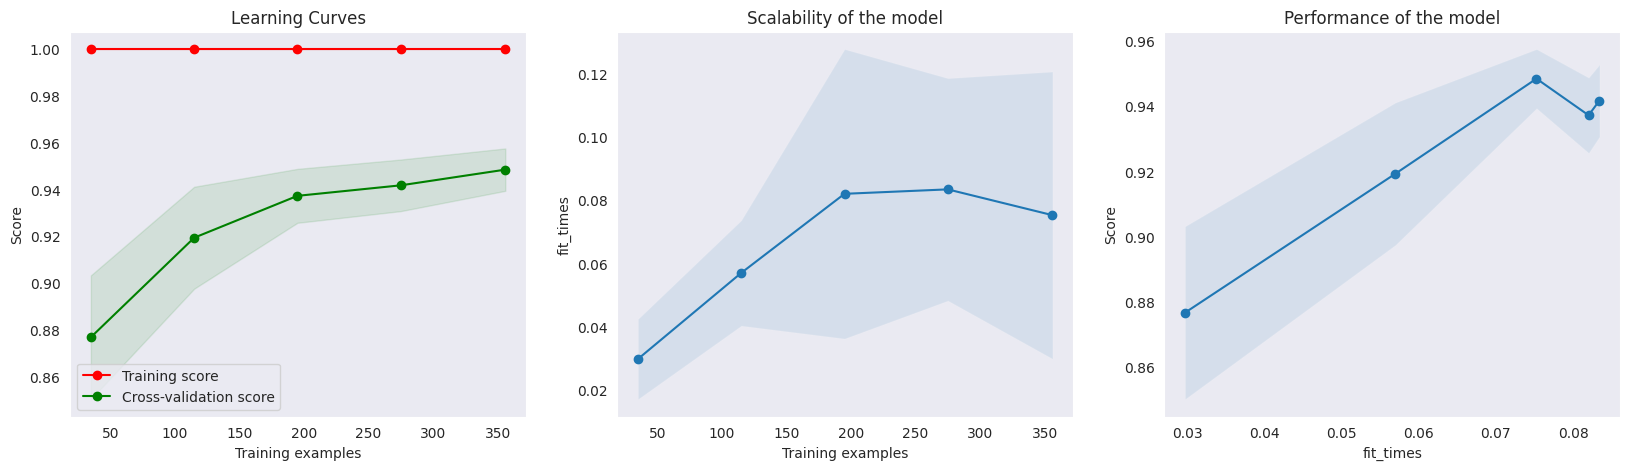

In [45]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline1_round1, 'Learning Curves',
                    X_train_cleaned_bow, y_train, n_jobs=-1)

### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [46]:
# let's check the train scores
print(best_estimator_pipeline1_round1.score(
    X_train_cleaned_bow, y_train))

# let's check the cross validation score
print(complete_grid_pipeline1_round1.best_score_)

1.0
0.9416530624584315


### <font color ='pickle'>**Evaluate model on test datset**

In [47]:
# Final Pipeline
def final_pipeline(text):
    # cleaned_text = cp.SpacyPreprocessor(model='en_core_web_sm').transform(text)
    cleaned_text = joblib.load(file_X_test_cleaned_bow)
    best_estimator_pipeline1_round1 = joblib.load(
        file_best_estimator_pipeline1_round1)
    predictions = best_estimator_pipeline1_round1.predict(cleaned_text)
    return predictions


In [48]:
# predicted values for Test data set
y_test_pred = final_pipeline(X_test)


In [49]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0])

In [50]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99        98
           1       0.93      0.93      0.93        14

    accuracy                           0.98       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.98      0.98      0.98       112



## <font color ='pickle'>**Pipeline 2: Data Preprocessing + Manual Features + ML Model pipeline**

In this case we will extract following features and use these as the input to our logistic regression.
  1. count of words
  2. count of characters
  3. count of characters without space
  4. average word length
  5. count of numbers
  7. number of nouns or propernouns
  8. number of aux
  9. number of verbs
  10. number of adjectives
  11. number of ner (entiites)

### <font color ='pickle'>**Generate Manual Features**

In [51]:
cp.SpacyPreprocessor??

In [52]:
X_train_cleaned_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_train)

/content/drive/MyDrive/NLP_SPAM/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [53]:
# save  this to a file
file_X_train_cleaned_basic = model_folder / 'X_train_cleaned_basic.pkl'
joblib.dump(X_train_cleaned_basic, file_X_train_cleaned_basic)

['/content/drive/MyDrive/NLP_SPAM/X_train_cleaned_basic.pkl']

In [54]:
X_test_cleaned_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_test)

In [55]:
# save  this to a file
file_X_test_cleaned_basic = model_folder / 'X_test_cleaned_basic.pkl'
joblib.dump(X_test_cleaned_basic, file_X_test_cleaned_basic)

['/content/drive/MyDrive/NLP_SPAM/X_test_cleaned_basic.pkl']

In [56]:
ManualFeatures??


In [57]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm', batch_size = 1000)


In [58]:
X_train_cleaned_basic = joblib.load(file_X_train_cleaned_basic)

In [59]:
X_train_features, feature_names = featurizer.fit_transform(X_train_cleaned_basic)


In [60]:
X_train_features[0:3]


array([[10.        , 54.        , 45.        ,  4.09090909,  0.        ,
         2.        ,  1.        ,  0.        ,  3.        ,  1.        ,
         0.        ],
       [ 4.        , 17.        , 15.        ,  3.        ,  0.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  0.        ,
         0.        ],
       [ 4.        , 23.        , 20.        ,  4.        ,  0.        ,
         1.        ,  2.        ,  0.        ,  0.        ,  2.        ,
         0.        ]])

In [61]:
feature_names


['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_numbers',
 'count_sentences',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

### <font color ='pickle'>**Create Pipeline**

In [62]:
classifier_2 = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000)),
])


### <font color ='pickle'>**Parameter Grid**

In [63]:
# we will try to overfit a samll dataset first

param_grid_classifier_2 = {'classifier__C': [100000]}


### <font color ='pickle'>**Specify Randomized Search**

In [64]:
# the typical value of cv used is 5. We are using 3, just for demonstration.

randserch_classifier_2 = RandomizedSearchCV(classifier_2,
                                 param_grid_classifier_2,
                                 cv=3)

### <font color ='pickle'>**Fit the Model**

In [65]:
# Fit the model on training data
randserch_classifier_2.fit(X_train_features, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('classifier',
                                              LogisticRegression(max_iter=10000))]),
                   param_distributions={'classifier__C': [100000]})

### <font color ='pickle'>**Get Best Params**

In [66]:
print(f'Best cross-validation score: {randserch_classifier_2.best_score_:.2f}')
print("\nBest parameters: ", randserch_classifier_2.best_params_)
print("\nBest estimator: ", randserch_classifier_2.best_estimator_)


Best cross-validation score: 0.95

Best parameters:  {'classifier__C': 100000}

Best estimator:  Pipeline(steps=[('classifier', LogisticRegression(C=100000, max_iter=10000))])


### <font color ='pickle'>**Save Model**

In [67]:
file_best_estimator_pipeline2_round1 = model_folder / \
    'pipeline2_round1_best_estimator.pkl'
file_complete_grid_pipeline2_round1 = model_folder / \
    'pipeline2_round1_complete_grid.pkl'


In [68]:
joblib.dump(randserch_classifier_2.best_estimator_,
            file_best_estimator_pipeline2_round1)
joblib.dump(randserch_classifier_2, file_complete_grid_pipeline2_round1)


['/content/drive/MyDrive/NLP_SPAM/pipeline2_round1_complete_grid.pkl']

### <font color ='pickle'>**Load Saved Model**

In [69]:
# load the saved model
best_estimator_pipeline2_round1 = joblib.load(
    file_best_estimator_pipeline2_round1)
complete_grid_pipeline2_round1 = joblib.load(
    file_complete_grid_pipeline2_round1)


### <font color ='pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

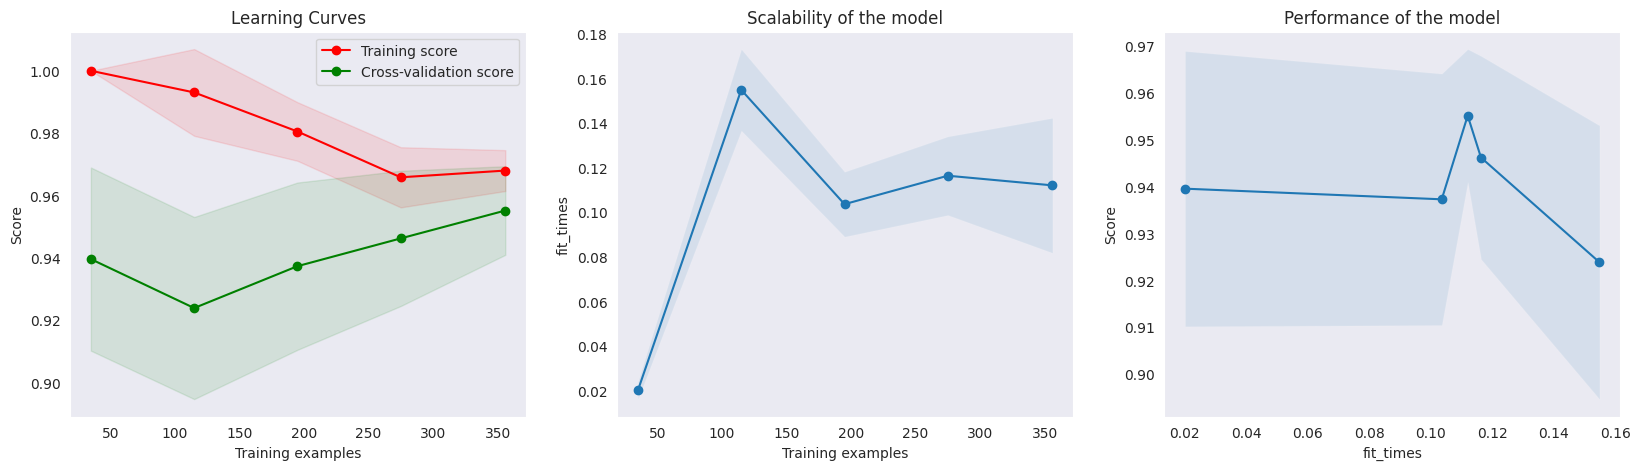

In [70]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline2_round1, 'Learning Curves',
                    X_train_features, y_train, n_jobs=-1)


### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [71]:
# let's check the train scores
print(best_estimator_pipeline2_round1.score(X_train_features, y_train))

# let's check the cross validation score
print(complete_grid_pipeline2_round1.best_score_)


0.9641255605381166
0.9462180301106476


### <font color ='pickle'>**Evaluate model on test datset**

In [72]:
# Final Pipeline
def final_pipeline(text):
    text_cleaned = joblib.load(file_X_test_cleaned_basic)
    features, feature_names = featurizer.fit_transform(text_cleaned)
    best_estimator_pipeline2_round1 = joblib.load(
        file_best_estimator_pipeline2_round1)
    predictions = best_estimator_pipeline2_round1.predict(features)
    return predictions


In [73]:
# predicted values for Test data set
y_test_pred = final_pipeline(X_test)
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0])

### <font color ='pickle'>**Classification report for test dataset**

In [74]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))



Test set classification report:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98        98
           1       0.92      0.79      0.85        14

    accuracy                           0.96       112
   macro avg       0.94      0.89      0.91       112
weighted avg       0.96      0.96      0.96       112



## <font color ='pickle'>**Pipeline 3: Combine Manual Features and TF-IDF vectors**

### <font  color ='pickle'>**Combine Manual Features and tfidf features**

<font size = 4, color ='indianred'>**The approach described in this section is generic and can be used to combine any text with non-text related variables**.

In [75]:
X_train_cleaned_bow = joblib.load(file_X_train_cleaned_bow)


In [76]:
X_train_final = pd.concat((pd.DataFrame(X_train_cleaned_bow, columns=['cleaned_text']),
                           pd.DataFrame(X_train_features, columns=feature_names)), axis=1)


In [77]:
X_train_final.head()


,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_numbers,count_sentences,noun_count,aux_count,verb_count,adj_count,ner
0,try dear read exam,10.0,54.0,45.0,4.090909,0.0,2.0,1.0,0.0,3.0,1.0,0.0
1,oredi,4.0,17.0,15.0,3.000000,0.0,1.0,1.0,1.0,1.0,0.0,0.0
2,happy new year melody,4.0,23.0,20.0,4.000000,0.0,1.0,2.0,0.0,0.0,2.0,0.0
3,wat time ì finish,4.0,19.0,16.0,3.200000,0.0,1.0,5.0,0.0,0.0,0.0,0.0
4,hmmm guess 4 kb n power yoga haha dunno tahan ...,24.0,119.0,96.0,3.840000,1.0,1.0,12.0,2.0,5.0,0.0,2.0


In [78]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cleaned_text               446 non-null    object 
 1   count_words                446 non-null    float64
 2   count_characters           446 non-null    float64
 3   count_characters_no_space  446 non-null    float64
 4   avg_word_length            446 non-null    float64
 5   count_numbers              446 non-null    float64
 6   count_sentences            446 non-null    float64
 7   noun_count                 446 non-null    float64
 8   aux_count                  446 non-null    float64
 9   verb_count                 446 non-null    float64
 10  adj_count                  446 non-null    float64
 11  ner                        446 non-null    float64
dtypes: float64(11), object(1)
memory usage: 41.9+ KB


In [79]:
subset = X_train_final[0:10]


In [80]:
subset.shape

(10, 12)

In [81]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)


In [82]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)), ])


In [83]:
sparse_features.fit_transform(subset.iloc[:, 1:])


<10x11 sparse matrix of type '<class 'numpy.float64'>'
	with 80 stored elements in Compressed Sparse Row format>

In [84]:
vectorizer.fit_transform(subset.iloc[:, 0])


<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [85]:
combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)


In [86]:
test = combined_features.fit_transform(subset)


In [87]:
test

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  10.        ,  54.        ,  45.        ,
          4.09090909,   0.        ,   2.        ,   1.        ,
          0.        ,   3.        ,   1.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   4.        ,  17.        ,  15.        ,
          3.        ,   0.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   4.        ,  23.        ,  20.        ,
          4.        ,   0.        ,   1.        ,   2.        ,
          0.        ,   0.        ,   2.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   4.        ,  19.        ,  16.        ,
          3.2       ,   0.        ,   1.        ,   5.        ,
          0.        ,   0.        ,  

In [88]:
test.dtype

dtype('float64')

### <font color ='pickle'>**Create Final Pipeline**

In [89]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(max_iter=10000)),
                         ])


In [90]:
classifier_3.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'combined_features', 'classifier', 'combined_features__n_jobs', 'combined_features__remainder__memory', 'combined_features__remainder__steps', 'combined_features__remainder__verbose', 'combined_features__remainder__sparse', 'combined_features__remainder', 'combined_features__sparse_threshold', 'combined_features__transformer_weights', 'combined_features__transformers', 'combined_features__verbose', 'combined_features__verbose_feature_names_out', 'combined_features__tfidf', 'combined_features__tfidf__memory', 'combined_features__tfidf__steps', 'combined_features__tfidf__verbose', 'combined_features__tfidf__tfidf', 'combined_features__tfidf__tfidf__analyzer', 'combined_features__tfidf__tfidf__binary', 'combined_features__tfidf__tfidf__decode_error', 'combined_features__tfidf__tfidf__dtype', 'combined_features__tfidf__tfidf__encoding', 'combined_features__tfidf__tfidf__input', 'combined_features__tfidf__tfidf__lowercase', 'combined_features__tfidf_

### <font color ='pickle'>**Parameter Grid**

In [91]:
# We are exploring a small combination of parameters
# If the search space is very large then we should use RandomSerachCV or some other methods

param_grid_classifier_3 = {'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000],
                           'classifier__C': [0.1, 1, 10]
                           }


### <font color ='pickle'>**Specify GridSearch**

In [92]:
# We will now use Gridserach to find fine tune hyperparameters using cross validation
# the typical value of cv used is 5. We are using 3, just for demonstration.

randserch_classifier_3 = RandomizedSearchCV(classifier_3,
                                 param_grid_classifier_3,
                                 cv=3)


### <font color ='pickle'>**Fit the Model**

In [93]:
# Fit the model on training data
randserch_classifier_3.fit(X_train_final, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('combined_features',
                                              ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                                                           SparseTransformer())]),
                                                                transformers=[('tfidf',
                                                                               Pipeline(steps=[('tfidf',
                                                                                                TfidfVectorizer(max_features=5))]),
                                                                               'cleaned_text')])),
                                             ('classifier',
                                              LogisticRegression(max_iter=10000))]),
                   param_distributions={'classifier__C': [0.1, 1, 10],
                                        'combined_features__tfidf__tfidf__max_features': [500,
                                                                                          1000,
                                                                                          2000]})

### <font color ='pickle'>**Get Best Params**

In [94]:
print(
    "Best cross-validation score: {:.2f}".format(randserch_classifier_3.best_score_))
print("\nBest parameters: ", randserch_classifier_3.best_params_)
print("\nBest estimator: ", randserch_classifier_3.best_estimator_)


Best cross-validation score: 0.95

Best parameters:  {'combined_features__tfidf__tfidf__max_features': 500, 'classifier__C': 1}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500))]),
                                                  'cleaned_text')])),
                ('classifier', LogisticRegression(C=1, max_iter=10000))])


### <font color ='pickle'>**Save Model**

In [95]:
file_best_estimator_pipeline3_round1 = model_folder / \
    'pipeline3_round1_best_estimator.pkl'
file_complete_grid_pipeline3_round1 = model_folder / \
    'pipeline3_round1_complete_grid.pkl'


In [96]:
joblib.dump(randserch_classifier_3.best_estimator_,
            file_best_estimator_pipeline3_round1)
joblib.dump(randserch_classifier_3, file_complete_grid_pipeline3_round1)


['/content/drive/MyDrive/NLP_SPAM/pipeline3_round1_complete_grid.pkl']

### <font color ='pickle'>**Load Saved Model**

In [97]:
# load the saved model
best_estimator_pipeline3_round1 = joblib.load(
    file_best_estimator_pipeline3_round1)
complete_grid_pipeline3_round1 = joblib.load(
    file_complete_grid_pipeline3_round1)


### <font color ='pickle'>**Plot Learning Curve**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

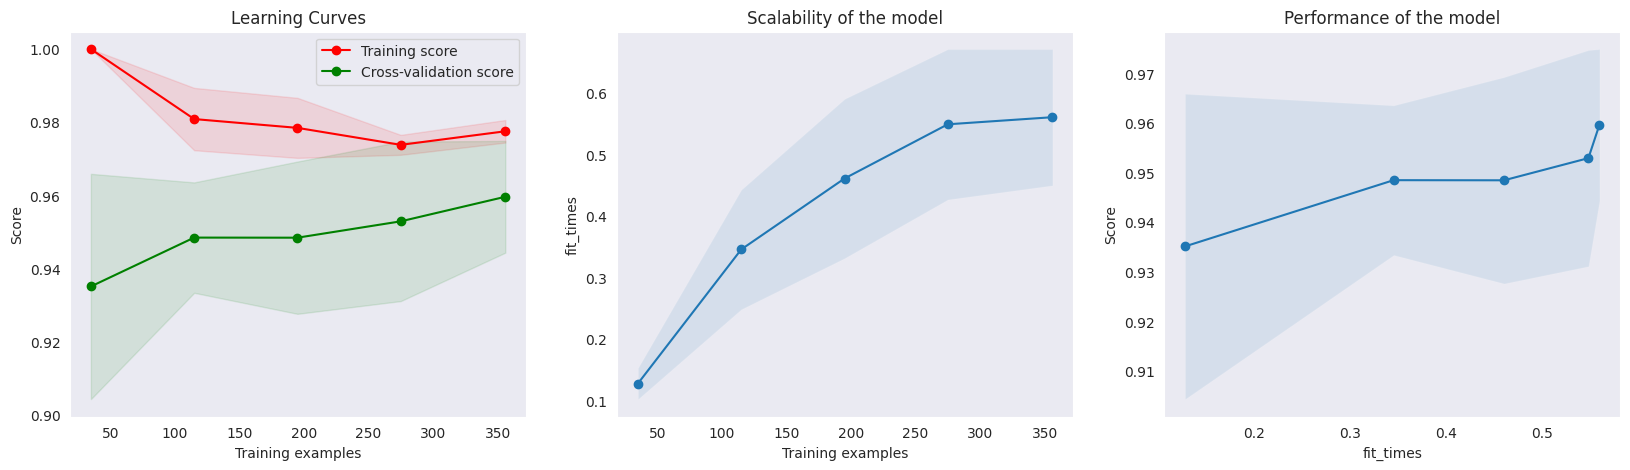

In [98]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline3_round1, 'Learning Curves',
                    X_train_final, y_train, n_jobs=-1)


### <font color = 'pickle'>**Check Cross Validation Score and Train Score**

In [99]:
# let's check the train scores
print(best_estimator_pipeline3_round1.score(X_train_final, y_train))

# let's check the cross validation score
print(complete_grid_pipeline3_round1.best_score_)


0.9753363228699552
0.9529294395066207


### <font color ='pickle'>**Evaluate model on test datset**

In [100]:
X_test.shape


(112,)

In [101]:
# Final Pipeline
def final_pipeline(text):
    # cleaned_text = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 1000).transform(text)
    cleaned_text = joblib.load(file_X_test_cleaned_bow)
    X_features, feature_names = featurizer.fit_transform(text)
    X_final = pd.concat((pd.DataFrame(cleaned_text, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    best_estimator_pipeline3_round1 = joblib.load(
        file_best_estimator_pipeline3_round1)
    predictions = best_estimator_pipeline3_round1.predict(X_final)
    return predictions


In [102]:
# predicted values for Test data set
y_test_pred = final_pipeline(X_test)


In [103]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0])

### <font color ='pickle'>**Classification report for test dataset**

In [104]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))



Test set classification report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98        98
           1       0.92      0.86      0.89        14

    accuracy                           0.97       112
   macro avg       0.95      0.92      0.94       112
weighted avg       0.97      0.97      0.97       112



From the 3 pipelines, I got good F1 scores for the the first pipeline (tf-idf), We need to consider to F1 score as the metric for imbalanced datasets like spam detection